#### 03_형태학적 변환 팽창과 침식
- 항상 Gray Scale로 진행
- 물체를 따고 싶을 때 사용

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [7]:
image_path = '../99_Studyfile/02_Sample/apple.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#### 03_01 확장 침식 칠험 : Mask 추가

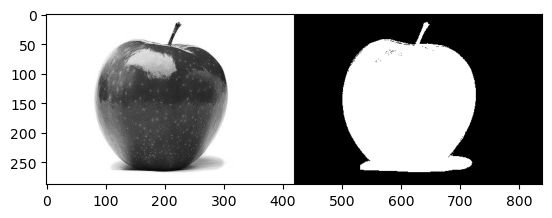

In [8]:

_, mask = cv2.threshold(image, 230, 255, cv2.THRESH_BINARY_INV) # 230보다 큰 값들은 255로 지정

image_list = np.hstack([
    image,
    mask
])

plt.imshow(image_list, 'gray')
plt.show()

#### 03_02 확장 침식 실험 : kernel, dilation 추가

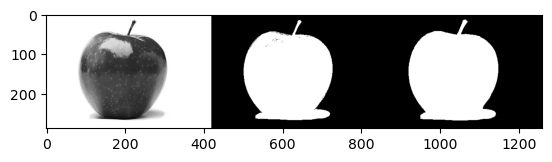

In [9]:
kernel = np.ones((3,3), np.uint8)   # uint8 : 부호 없는 정수
dilation = cv2.dilate(mask,kernel, iterations=1)    # 두 가지를 동시에 사용하면 더 깔끔

image_list = np.hstack([
    image,
    mask,
    dilation
])

plt.imshow(image_list, 'gray')
plt.show()

#### 03_03 확장 침식 실험 : Erosion 추가

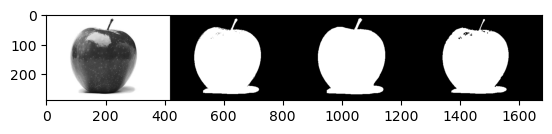

In [10]:
erosion = cv2.erode(mask, kernel)   # 침식

image_list = np.hstack([
    image,
    mask,
    dilation,
    erosion
])

plt.imshow(image_list, 'gray')
plt.show()

#### 03_04 확장 침식 실험 : Opening, Closing 추가

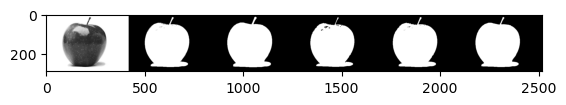

In [11]:
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

image_list = np.hstack([
    image,
    mask,
    dilation,
    erosion,
    opening,
    closing
])

plt.imshow(image_list, 'gray')
plt.show()

#### 03_05 확장 침식 실험 : Gradient, TopHat 추가

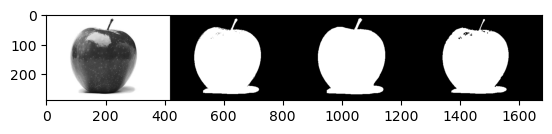

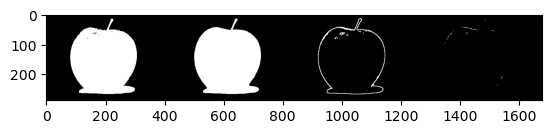

In [12]:
# MORPH_GRADIENT 연산은 이미지에서 경계, 윤곽선, 테두리 등을 추출하는 데 사용될 수 있습니다
mg = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel)

# MORPH_TOPHAT 연산은 이미지의 밝은 영역에서 뚜렷한 경계를 강조하는 데 사용될 수 있습니다.
th = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernel)

image_list_01 = np.hstack([
    image,
    mask,
    dilation,
    erosion
])
image_list_02 = np.hstack([
    opening,
    closing,
    mg,
    th
])

plt.imshow(image_list_01, 'gray')
plt.show()

plt.imshow(image_list_02, 'gray')
plt.show()